<h1>Project COMP3359 Data Visualization and Processing</h1>

pip install the necessary package

In [1]:
# !pip install tensorflow==1.5.0
# !pip install cython
!pip install tensorflow_hub

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, MaxPool2D

# Show all column in data visualization one hot encoded
pd.set_option('max_columns', None)

In [3]:
import random
RAND_SEED = 3359
random.seed(RAND_SEED)

tf.random.set_seed(RAND_SEED)

In [4]:
print(os.listdir("./dataset_1"))
# print(os.listdir("./dataset_1/asl_alphabet_train"))
# print(os.listdir("./dataset_1/asl_alphabet_train/A"))

['.DS_Store', 'asl_alphabet_test', 'asl_alphabet_train']


Right now, the dataset found online contains 87,000 images for the training set (3,000 for each sign, A-Z, space, del and nothing). While the test set only contains 29 images, one for each sign aforementioned. Therefore, we will only use the training set and divide the 87,000 images to training, dev, and test set for our model. The 29 images from the online dataset will be used manually to check the performance of our model at the end. From the 87,000 images, we will use 80% as training dataset (69,600), 10% as dev dataset (8,700), and 10% as test dataset (8,700).

In [5]:
# Function to combine images, its labels and paths
def segment_data(data_folder, destination_label, destination_filename, destination_path):
    for file_name in os.listdir(data_folder):
        destination_filename.append(file_name)
        if file_name.startswith("A"):
            destination_label.append("A")
        elif file_name.startswith("B"):
            destination_label.append("B")
        elif file_name.startswith("C"):
            destination_label.append("C")
        elif file_name.startswith("D"):
            destination_label.append("D")
        elif file_name.startswith("E"):
            destination_label.append("E")
        elif file_name.startswith("F"):
            destination_label.append("F")
        elif file_name.startswith("G"):
            destination_label.append("G")
        elif file_name.startswith("H"):
            destination_label.append("H")
        elif file_name.startswith("I"):
            destination_label.append("I")
        elif file_name.startswith("J"):
            destination_label.append("J")
        elif file_name.startswith("K"):
            destination_label.append("K")
        elif file_name.startswith("L"):
            destination_label.append("L")
        elif file_name.startswith("M"):
            destination_label.append("M")
        elif file_name.startswith("N"):
            destination_label.append("N")
        elif file_name.startswith("O"):
            destination_label.append("O")
        elif file_name.startswith("P"):
            destination_label.append("P")
        elif file_name.startswith("Q"):
            destination_label.append("Q")
        elif file_name.startswith("R"):
            destination_label.append("R")
        elif file_name.startswith("S"):
            destination_label.append("S")
        elif file_name.startswith("T"):
            destination_label.append("T")
        elif file_name.startswith("U"):
            destination_label.append("U")
        elif file_name.startswith("V"):
            destination_label.append("V")
        elif file_name.startswith("W"):
            destination_label.append("W")
        elif file_name.startswith("X"):
            destination_label.append("X")
        elif file_name.startswith("Y"):
            destination_label.append("Y")
        elif file_name.startswith("Z"):
            destination_label.append("Z")
        elif file_name.startswith("del"):
            destination_label.append("del")
        elif file_name.startswith("nothing"):
            destination_label.append("nothing")
        elif file_name.startswith("space"):
            destination_label.append("space")
        destination_path.append(os.path.join(data_folder, file_name))

In [6]:
train_dir = "./dataset_1/asl_alphabet_train"

# We will not use this folder as mentioned earlier
test_dir = "./dataset_1/asl_alphabet_test"

# test_label = []
# test_filename = []
# test_path = []
# test_paths = [ os.path.join(test_dir, file_name) for file_name in os.listdir(test_dir) ]
# segment_data(test_dir, test_label, test_filename, test_path)
# print(test_label)
# print(test_filename)
# print(test_paths)

sign_label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
              'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
              'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space', 'nothing', 'del']

print("(sign label, sign meaning): ")
print(list(zip(range(len(sign_label)), sign_label)))

# test_df = pd.DataFrame(list(zip(test_filename, test_label)),
#                   columns=['Filenames', 'Sign'])

# # print(train_df)

# test_df_hot_encoded = pd.get_dummies(test_df.Sign)
# test_df_hot_encoded.insert(0, "Filenames", test_df["Filenames"])
# test_df_hot_encoded.head(30)

(sign label, sign meaning): 
[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E'), (5, 'F'), (6, 'G'), (7, 'H'), (8, 'I'), (9, 'J'), (10, 'K'), (11, 'L'), (12, 'M'), (13, 'N'), (14, 'O'), (15, 'P'), (16, 'Q'), (17, 'R'), (18, 'S'), (19, 'T'), (20, 'U'), (21, 'V'), (22, 'W'), (23, 'X'), (24, 'Y'), (25, 'Z'), (26, 'space'), (27, 'nothing'), (28, 'del')]


In [7]:
images_label = []
images_filename = []
images_path = []
images_label_numeric = []

for x in sign_label:
    images_folder = train_dir + "/" + x
    segment_data(images_folder, images_label, images_filename, images_path)
    
for x in images_label:
    images_label_numeric.append(sign_label.index(x))

# print(sign_label.index(images_label[0]))    

images_df = pd.DataFrame(list(zip(images_filename, images_label_numeric)),
                  columns=['Filenames', 'Sign'])

images_df_hot_encoded = pd.get_dummies(images_df.Sign)
images_df_hot_encoded.insert(0, "Filenames", images_df["Filenames"])


# Shuffle the data
# images_df_shuffled = images_df_hot_encoded.sample(frac=1).reset_index(drop=True)
images_df_shuffled = images_df.sample(frac=1).reset_index(drop=True)
print("===== Shuffled Images Df =====")
images_df_shuffled
# RANDOM NOT USING SEED MAYBE USE RANDOM.SHUFFLE

===== Shuffled Images Df =====


,Filenames,Sign
0,U2577.jpg,20
1,X2224.jpg,23
2,A360.jpg,0
3,D401.jpg,3
4,N1205.jpg,13
...,...,...
86995,X1732.jpg,23
86996,nothing1362.jpg,27
86997,del2700.jpg,28
86998,W1368.jpg,22


Now divide the data as mentioned earlier (80%, 10%, 10%)

In [8]:
# Shuffles the image path
random.shuffle(images_path)

# Take the first 6,700 for dev
# Take the last 6,700 for test
train_path = images_path[6700:80300]
dev_path = images_path[80300:]
test_path = images_path[:6700]


print(train_path[73500])
print(dev_path[0])
print("Training set:", len(train_path))
print("Dev set:", len(dev_path))
print("Test set:",len(test_path))

./dataset_1/asl_alphabet_train/S/S2596.jpg
./dataset_1/asl_alphabet_train/del/del2326.jpg
Training set: 73600
Dev set: 6701
Test set: 6700


In this section, we will visualize our data before pre-processing which we will do in the next section to compare the difference and check whether our image has actually been pre-processed or not. 

In [9]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
#     a = a * 255
    plt.imshow(a)
    plt.axis('on')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
# plotHistogram(X_train[1])

./dataset_1/asl_alphabet_train/O/O1864.jpg
(200, 200, 3)
./dataset_1/asl_alphabet_train/T/T1272.jpg
(200, 200, 3)
./dataset_1/asl_alphabet_train/K/K499.jpg
(200, 200, 3)
./dataset_1/asl_alphabet_train/R/R232.jpg
(200, 200, 3)
./dataset_1/asl_alphabet_train/D/D1609.jpg
(200, 200, 3)


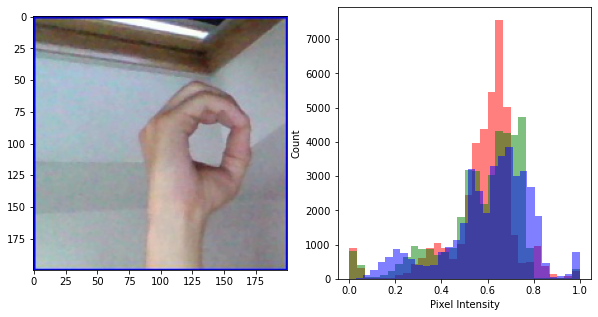

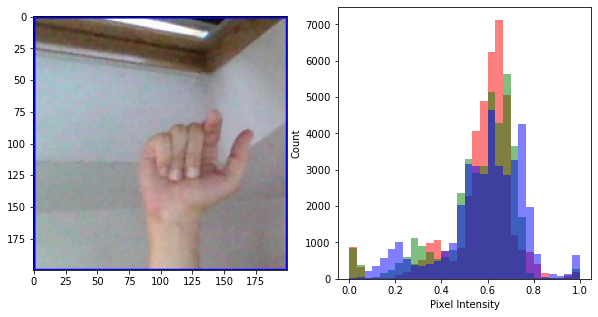

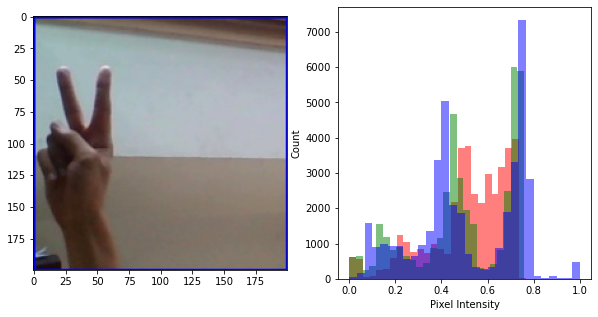

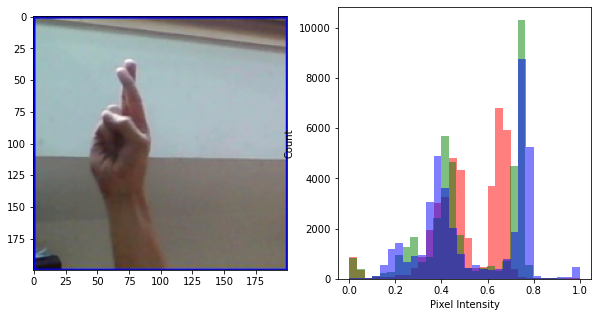

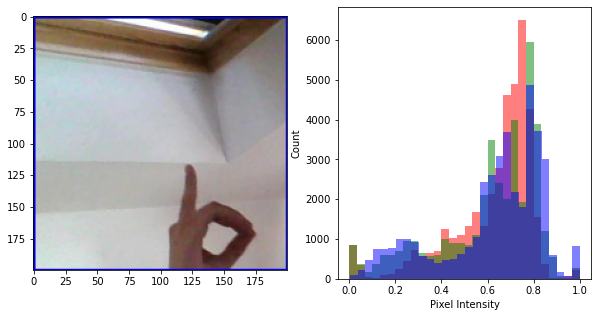

In [10]:
# Converting 5 images to tensors manuallly.

for i in range(5):
    print(train_path[i])
    path = train_path[i]
    image = tf.keras.preprocessing.image.load_img(path)
    image_tensor = tf.keras.preprocessing.image.img_to_array(image)
    # Normalize image
    image_tensor = image_tensor / 255.0
#     image_tensor = tf.image.convert_image_dtype(image_tensor, dtype=tf.int16, saturate=False)
#     print(image_tensor)
    print(image_tensor.shape)
    plotHistogram(image_tensor)

Now, we use Keras "ImageDataGenerator" (data pipeline) to easily convert images into a suitable format to be fitted into our model. This is where we pre-process and augment our data. The Keras "ImageDataGenerator" has many readily available functions to convert images into tensor and data augmentation such as shifting, rotation, brightness altering, etc.

In [11]:
datagen = ImageDataGenerator(rescale = 1/255)

train_generator = datagen.flow_from_dataframe(
        dataframe = images_df_shuffled[6700:80300],
        directory = train_dir,
        x_col = "Filenames",
        y_col = "Sign",
        batch_size = 32,
        seed = RAND_SEED,
        shuffle = True,
        class_mode = "raw",
        target_size = (200,200)
    )  

dev_generator = train_generator = datagen.flow_from_dataframe(
        dataframe = images_df_shuffled[80300:],
        directory = train_dir,
        x_col = "Filenames",
        y_col = "Sign", # Was sign lable
        batch_size = 32,
        seed = RAND_SEED,
        shuffle = True,
        class_mode = "raw", #raw
        target_size = (200,200)
    )  

test_generator = train_generator = datagen.flow_from_dataframe(
        dataframe = images_df_shuffled[:6700],
        directory = train_dir,
        x_col = "Filenames",
        y_col = "Sign",
        batch_size = 32,
        seed = RAND_SEED,
        shuffle = True,
        class_mode = "raw",
        target_size = (200,200)
    )  

# Trying to combine but fail
# for x in sign_label:
#     if x != 'A':
#         temp_generator = datagen.flow_from_dataframe(
#             dataframe = images_df_hot_encoded[:29],
#             directory = train_dir + "/" + x,
#             x_col = "Filenames",
#             y_col = sign_label,
#             batch_size = 32,
#             seed = RAND_SEED,
#             shuffle = True,
#             class_mode = "raw",
#             target_size = (100,100)
#         )  
#         print(train_generator)
    
#     while True:
        


Found 73599 validated image filenames.
Found 6700 validated image filenames.
Found 6700 validated image filenames.


/Users/vieriharney/opt/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Filenames". These filename(s) will be ignored.
  warnings.warn(


(32, 200, 200, 3)
0


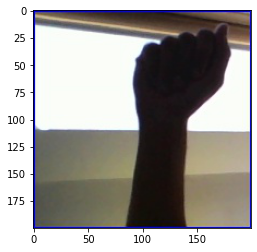

(32, 200, 200, 3)
28


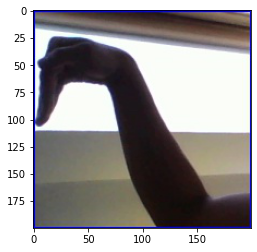

(32, 200, 200, 3)
2


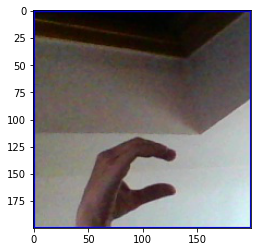

(32, 200, 200, 3)
14


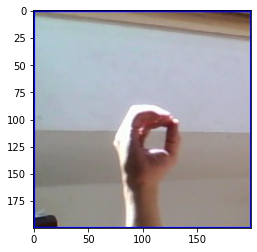

(32, 200, 200, 3)
18


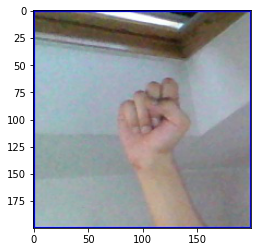

In [12]:
# Data visualization before processing
# def plotHistogram(a):
#     """
#     Plot histogram of RGB Pixel Intensities
#     """
#     plt.figure(figsize=(10,5))
#     plt.subplot(1,2,1)
#     plt.imshow(a)
#     plt.axis('off')
#     histo = plt.subplot(1,2,2)
#     histo.set_ylabel('Count')
#     histo.set_xlabel('Pixel Intensity')
#     n_bins = 30
#     plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
#     plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
#     plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
    
# plotHistogram(train_generator[1])

for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

Construct an image classifier model CNN
https://www.kaggle.com/mattbast/image-classification-tensorflow-cnn

In [13]:
# Check if any GPU is detected
print("Is GPU available: ", tf.test.is_gpu_available())
print("GPU(s) found: ")
print(tf.config.experimental.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available:  False
GPU(s) found: 
[]


In [14]:
# model = Sequential([])
# # Convolution layer 1, input shape as image size and chaneel (RGB)
# model.add(Conv2D(64,(3,3),activation="relu",input_shape=(50,50,3)))
# model.add(MaxPooling2D(2,2))

# # Convolution layer 2
# model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(MaxPooling2D(2,2))

# # Last layer, using a softmax layer since it is a multiclass classification problem
# model.add(Flatten())
# model.add(Dense(256,activation="relu"))
# model.add(Dense(26,activation="softmax"))

model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3), padding = 'same', activation="relu",input_shape=(200,200,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32,(3,3),padding = 'same', activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation="relu"),
    keras.layers.Dense(29, activation='softmax')
    
    
#     keras.layers.Flatten(input_shape=(200, 200, 3)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               9600120   
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3

Train the model

In [15]:
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=2, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1),
]

In [16]:
train_log = model.fit(
    train_generator,
    validation_data=dev_generator,
    epochs=5,
    callbacks=callbacks
)

# model.fit_generator(train_generator, steps_per_epoch = 50, epochs = 20)

Epoch 1/5
210/210 [==============================] - 231s 1s/step - loss: 3.4283 - accuracy: 0.0720 - val_loss: 2.1787 - val_accuracy: 0.3281
Epoch 2/5
210/210 [==============================] - 232s 1s/step - loss: 1.7755 - accuracy: 0.4553 - val_loss: 1.3500 - val_accuracy: 0.5637
Epoch 3/5
210/210 [==============================] - 229s 1s/step - loss: 0.8903 - accuracy: 0.7212 - val_loss: 1.0105 - val_accuracy: 0.6664
Epoch 4/5
210/210 [==============================] - 230s 1s/step - loss: 0.4457 - accuracy: 0.8631 - val_loss: 0.8614 - val_accuracy: 0.7299
Epoch 5/5
210/210 [==============================] - 231s 1s/step - loss: 0.2856 - accuracy: 0.9110 - val_loss: 0.8321 - val_accuracy: 0.7549


In [17]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("===== Model Evaluation =====")
print("Test accuracy:",test_acc)

210/210 - 42s - loss: 0.1657 - accuracy: 0.9564
===== Model Evaluation =====
Test accuracy: 0.9564179182052612


['F_test.jpg', 'G_test.jpg', 'A_own_white_bg.jpg', 'del_test.jpg', 'L_test.jpg', 'M_test.jpg', 'R_test.jpg', 'S_test.jpg', 'X_test.jpg', 'Y_test.jpg', 'A_Reno.jpg', 'U_test.jpg', 'T_test.jpg', 'A_test.jpg', 'A_own.jpg', 'K_test.jpg', 'J_test.jpg', 'Z_test.jpg', 'nothing_test.jpg', 'Q_test.jpg', 'P_test.jpg', 'space_test.jpg', 'O_test.jpg', 'N_test.jpg', 'E_test.jpg', 'D_test.jpg', 'H_test.jpg', 'I_test.jpg', 'B_test.jpg', 'C_test.jpg', 'V_test.jpg', 'W_test.jpg']
./dataset_1/asl_alphabet_test/A_own_white_bg.jpg
(200, 200, 3)
(1, 200, 200, 3)
L


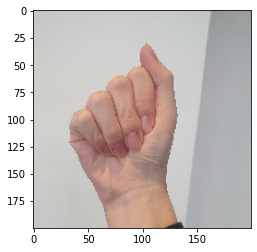

In [19]:
test_path = os.listdir(test_dir)
print(test_path)
test_path = [os.path.join(test_dir, p) for p in test_path]
own_hand = test_path[2]
print(own_hand)

image = tf.keras.preprocessing.image.load_img(own_hand)
image_tensor = tf.keras.preprocessing.image.img_to_array(image)
# Normalize image

resized = tf.image.resize(image_tensor, [200,200])
resized = resized / 255.0
print(resized.shape)
# plt.imshow(image_tensor)


# print(resized.shape)
plt.imshow(resized)
resized = tf.expand_dims(resized, axis=0)
print(resized.shape)
# resized = tf.reshape(resized, (1, 200, 200, 3))
# resized.reshape(1, 200, 200, 3)
# print(resized.shape)



import numpy as np
# image_batch = np.array(resized)
# image_batch.reshape(-1, 200, 200, 3)
# print(image_batch.shape)

pred_labels = model.predict(resized)
print(sign_label[np.argmax(pred_labels)])

Predicting the whole batch from the 29 images in test_dir earlier which were not used to do manual checking

In [20]:
import numpy as np

image_batch = []
for path in test_path:
    image = tf.keras.preprocessing.image.load_img(path)
    image_tensor = tf.keras.preprocessing.image.img_to_array(image)
    image_tensor = tf.image.resize(image_tensor / 255.0, [200,200])
    image_batch.append(image_tensor)
    
    
image_batch = np.array(image_batch)

print(image_batch.shape)

pred_labels = model.predict(image_batch)
pred_labels = [np.argmax(pred_labels[i]) for i in range(len(image_batch))]

pred_class_names = [ sign_label[pl] for pl in pred_labels ]
print("Predictions: ", pred_class_names)

(32, 200, 200, 3)
Predictions:  ['F', 'G', 'L', 'del', 'O', 'M', 'X', 'S', 'X', 'Y', 'P', 'W', 'T', 'A', 'W', 'K', 'J', 'Z', 'nothing', 'Q', 'P', 'space', 'O', 'N', 'E', 'E', 'H', 'T', 'B', 'C', 'V', 'W']


Check our result in a confusion matrix to visualize which part our model got wrong

Saving our first model try

In [ ]:
model.save("model_1")
model.save("converted_1")

Convert it to tflite model, faster version of the model, which is suitable for mobile apps

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("converted_1") # path to the SavedModel directory
model_converted = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(model_converted)

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(64,(3,3), padding = 'same', activation="relu",input_shape=(200,200,3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32,(3,3),padding = 'same', activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(29, activation='softmax')
    
    
#     keras.layers.Flatten(input_shape=(200, 200, 3)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()

In [ ]:
train_log = model_2.fit(
    train_generator,
    validation_data=dev_generator,
    epochs=30,
    callbacks=callbacks
)

Visualize the training result from the 2nd Model, more epoch and higher steps per epoch

In [ ]:
##### Loss #####
# Get training results
history_dict = train_log.history
train_acc = history_dict['loss']
test_acc = history_dict['val_loss']

# Plot training results
plt.plot(train_acc, label='Train Loss')
plt.plot(test_acc, label='Test Loss')

# Show plot
plt.title('Model Training Results (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="lower right")
plt.grid()
plt.show()

##### Accuracy #####
# Get training results
history_dict = train_log.history
train_acc = history_dict['accuracy']
test_acc = history_dict['val_accuracy']

# Plot training results
plt.plot(train_acc, label='Train Acc.')
plt.plot(test_acc, label='Test Acc.')

# Show plot
plt.title('Model Training Results (Acc.)')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Using confusion Matrix to see which label our Model perform poorly on

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


Y_pred = model_2.predict_generator(validation_generator, len(test_path) // 32+1)
# Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))


# # Compute confusion matrix based on predictions
# cm = confusion_matrix(
#     np.argmax(Y_pred, axis=1),  # ground-truths
#     np.argmax(model.predict(test_generator), axis=1), # predictions
# )
# # Pack confusion matrix as a pd DataFrame for visualization using seaborn
# df_cm = pd.DataFrame(
#     cm, 
#     index=sign_label, columns=sign_label
# )

# # Prepare annotations "# preds (percentage)" for visualization
# annotations = [ 
#     [ "{} ({:.2f}%)".format(value, value/len(y_test)*100) for value in row ] 
#     for row in cm 
# ]

# # Visualize confusion matrix using seaborn heatmap
# sn.heatmap(df_cm, 
#            annot=annotations, fmt='',
#            cmap="Blues_r", cbar_kws={'label': '# Predictions'},
#            linecolor='w', linewidths=1)

# # Show plot
# plt.title("Confusion Matrix")
# plt.xlabel("Prediction")
# plt.ylabel("Ground-truth")
# plt.show()

Now try using pre-trained GoogleNet model (Not available in TF) https://ai.plainenglish.io/googlenet-inceptionv1-with-tensorflow-9e7f3a161e87

Use MobileNetV2 instead. https://www.tensorflow.org/tutorials/images/transfer_learning

https://towardsdatascience.com/multi-label-image-classification-in-tensorflow-2-0-7d4cf8a4bc72

In [ ]:
import tensorflow.keras.backend as K

# inputs = tf.keras.Input(shape=(200, 200, 3))
# # input_image = tf.keras.layers.Reshape((200, 200), input_shape=(200, 200, 3))(inputs)
# input_image = tf.keras.layers.Lambda(lambda x: K.repeat_elements(K.expand_dims(x,3),3,3))(inputs)


base_model = tf.keras.applications.MobileNetV2(input_shape=(200,200,3),
#                                                input_tensor=input_image,
                                               include_top=False,
#                                                classes=29,
                                               weights='imagenet'
                                              )

In [ ]:
base_model.trainable = False
base_model.summary()

In [ ]:
# data_augmentation = tf.keras.Sequential([
#   tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
#   tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
# ])

# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# output = tf.keras.layers.Dense(29, activation='softmax')
# model_3 = tf.keras.Model(inputs=inputs, outputs=output)


# inputs = tf.keras.Input(shape=(200, 200, 3))
# # x = data_augmentation(inputs)
# x = base_model(x, training=False)
# x = global_average_layer(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# outputs = prediction_layer(x)
# model_3 = tf.keras.Model(inputs, outputs)

model_3 = tf.keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(29, activation='softmax', name='output')
])

# Keep lr small for transfer learning
base_learning_rate = 0.0001
model_3.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# model_3.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

model_3.summary()

In [ ]:
train_log = model_3.fit(
    train_generator,
    validation_data=dev_generator,
    epochs=10,
    callbacks=callbacks
)

https://towardsdatascience.com/how-we-built-an-easy-to-use-image-segmentation-tool-with-transfer-learning-546efb6ae98
https://medium.com/tensorflow2-mobilenets-a-pre-trained-multiclass/tensorflow2-mobilenets-a-pre-trained-multiclass-classifier-8a25d304c39d
https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub
https://www.tensorflow.org/tutorials/images/transfer_learning

In [ ]:
import tensorflow_hub as hub

headless_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(
    headless_model, input_shape=(224, 224, 3), trainable=False)

model_3 = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(29)
])

model_3.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [ ]:
train_log = model_3.fit(
    train_generator,
    validation_data=dev_generator,
    epochs=10,
    callbacks=callbacks
)

In [ ]:
test_path = os.listdir(test_dir)
print(test_path)
test_path = [os.path.join(test_dir, p) for p in test_path]
own_hand = test_path[2]
print(own_hand)

image = tf.keras.preprocessing.image.load_img(own_hand)
image_tensor = tf.keras.preprocessing.image.img_to_array(image)
# Normalize image

resized = tf.image.resize(image_tensor, [224,224])
resized = resized / 255.0
print(resized.shape)
# plt.imshow(image_tensor)


# print(resized.shape)
plt.imshow(resized)
resized = tf.expand_dims(resized, axis=0)
print(resized.shape)
# resized = tf.reshape(resized, (1, 200, 200, 3))
# resized.reshape(1, 200, 200, 3)
# print(resized.shape)



import numpy as np
# image_batch = np.array(resized)
# image_batch.reshape(-1, 200, 200, 3)
# print(image_batch.shape)

pred_labels = model_3.predict(resized)
print(sign_label[np.argmax(pred_labels)])

In [ ]:
import numpy as np

image_batch = []
for path in test_path:
    image = tf.keras.preprocessing.image.load_img(path)
    image_tensor = tf.keras.preprocessing.image.img_to_array(image)
    image_tensor = tf.image.resize(image_tensor / 255.0, [200,200])
    image_batch.append(image_tensor)
    
    
image_batch = np.array(image_batch)

print(image_batch.shape)

pred_labels = model_3.predict(image_batch)
pred_labels = [np.argmax(pred_labels[i]) for i in range(len(image_batch))]

pred_class_names = [ sign_label[pl] for pl in pred_labels ]
print("Predictions: ", pred_class_names)

Fine Tuning Model(Hypeparameter), Heat Map visualization, Error Analysis

In [21]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               9600120   
_________________________________________________________________
dense_1 (Dense)              (None, 29)                3

Prediction 1:  G
[<tf.Tensor: shape=(1, 29), dtype=float32, numpy=
array([[3.85228632e-05, 7.24358438e-03, 5.76435582e-07, 1.91287436e-05,
        2.76103674e-04, 5.16332779e-03, 9.50510502e-01, 2.23906580e-02,
        8.63167952e-05, 6.19290338e-04, 2.96576676e-04, 4.15131617e-05,
        8.15615422e-05, 6.79669145e-04, 3.61286902e-06, 2.20420305e-03,
        9.50124813e-04, 9.58643039e-04, 6.50555535e-07, 7.72520376e-04,
        2.32957595e-04, 5.30856138e-04, 1.23433847e-06, 1.02081816e-04,
        2.90781427e-05, 7.84780059e-06, 3.02607863e-04, 3.93424585e-07,
        6.45597326e-03]], dtype=float32)>, <tf.Tensor: shape=(1, 100, 100, 32), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.11449746],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.18481259],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.18384548],
         ...,
         [0.       

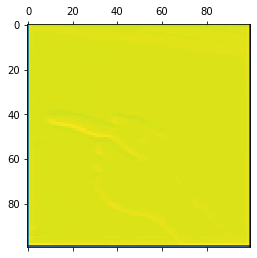

In [46]:
# Show heatmap for image 1 in test dataset
# resized = tf.image.resize(image_tensor, [224,224])
# resized = tf.expand_dims(resized, axis=0)

import tensorflow.keras.backend as K

x = tf.expand_dims((tf.image.resize(image_batch[1], [200, 200])/255), axis = 0)

prediction_1 = model.predict(x)
print("Prediction 1: ", sign_label[np.argmax(prediction_1)])


# prediction_1_output = model.output[:, 18]
# print(prediction_1_output)
# last_conv_layer = model.get_layer(index = 2)
# print(last_conv_layer)

# tf.compat.v1.enable_eager_execution() NEVER USE

with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer(index = 2)
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    print(iterate(x))
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))


heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
print(heatmap.shape)
heatmap /= np.max(heatmap)
# print(heatmap)
heatmap = heatmap.reshape((100, 100))
plt.matshow(heatmap)
plt.show()

In [89]:
# print(next(dev_generator)[1])

# ground_truth_df = images_df_shuffled[80300:]["Sign"]
# ground_truth = []
# ground_truth_df.head
# ground_truth_df[1].tolist()
ground_truth = images_df_shuffled[80300:]["Sign"].tolist()
print(ground_truth)

[20, 23, 6, 17, 19, 5, 8, 15, 21, 9, 5, 13, 9, 4, 2, 15, 5, 23, 9, 0, 18, 11, 14, 25, 3, 9, 22, 27, 26, 22, 2, 20, 23, 1, 2, 27, 1, 19, 17, 11, 9, 15, 26, 21, 12, 5, 0, 27, 9, 7, 4, 25, 26, 18, 11, 27, 21, 9, 6, 23, 23, 24, 16, 1, 2, 21, 12, 12, 28, 10, 18, 26, 24, 16, 3, 21, 2, 6, 0, 20, 4, 5, 12, 7, 25, 21, 11, 17, 13, 15, 14, 13, 12, 22, 4, 1, 21, 12, 18, 28, 24, 25, 20, 6, 2, 4, 20, 18, 9, 28, 28, 21, 2, 24, 24, 3, 24, 27, 28, 23, 12, 2, 17, 28, 17, 7, 27, 23, 21, 17, 10, 17, 24, 21, 25, 20, 7, 3, 17, 14, 7, 21, 7, 2, 3, 4, 9, 16, 4, 22, 9, 18, 11, 21, 26, 7, 15, 11, 10, 9, 15, 27, 26, 13, 21, 6, 1, 21, 14, 11, 5, 21, 8, 2, 14, 10, 9, 12, 24, 26, 8, 15, 14, 10, 23, 20, 22, 5, 19, 3, 16, 22, 13, 18, 8, 21, 13, 15, 3, 22, 9, 5, 0, 18, 10, 11, 17, 27, 8, 21, 4, 21, 21, 28, 24, 1, 21, 25, 16, 7, 0, 25, 24, 22, 20, 17, 3, 17, 18, 12, 8, 21, 22, 13, 16, 8, 21, 19, 16, 10, 25, 28, 9, 8, 21, 18, 18, 22, 26, 6, 28, 18, 20, 12, 21, 18, 25, 7, 20, 11, 12, 11, 8, 21, 19, 16, 22, 25, 3, 2, 9, 2

Confusion Matrix


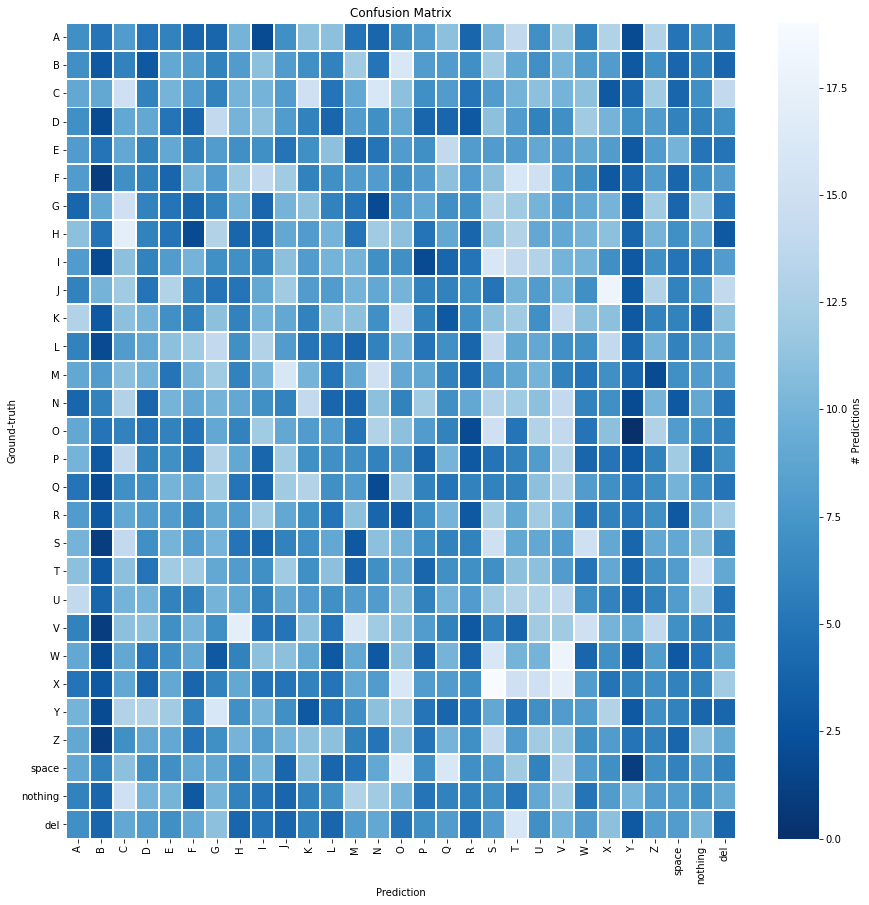

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

Y_pred = model.predict_generator(dev_generator, 6700 // 32+1)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(ground_truth, y_pred)

df_cm = pd.DataFrame(
    cm, 
    index=sign_label, columns=sign_label
)

# # Prepare annotations "# preds (percentage)" for visualization
# annotations = [ 
#     [ "{} ({:.2f}%)".format(value, value/len(ground_truth)*100) for value in row ] 
#     for row in cm 
# ]

plt.figure(figsize = (15,15))

# Visualize confusion matrix using seaborn heatmap
sn.heatmap(df_cm, 
#            annot=annotations, fmt='',
           cmap="Blues_r", cbar_kws={'label': '# Predictions'},
           linecolor='w', linewidths=1)

# Show plot
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Ground-truth")
plt.show()

In [ ]:
# batch normalization layer 
# Try grayscale